In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import powerbox as pbox

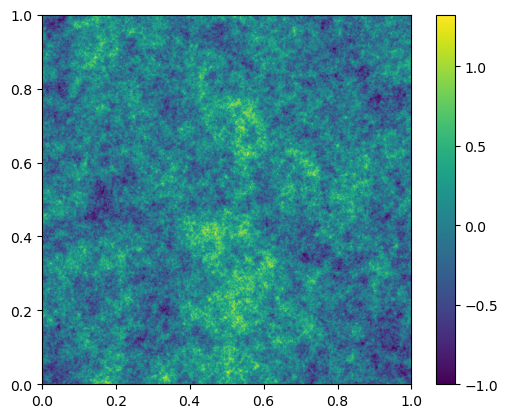

In [ ]:
pb = pbox.PowerBox(
    N=512,                     # Number of grid-points in the box
    dim=2,                     # 2D box
    pk = lambda k: 0.1*k**-2., # The power-spectrum
    boxlength = 1.0,           # Size of the box (sets the units of k in pk)
    seed = 1010,               # Set a seed to ensure the box looks the same every time (optional)
    ensure_physical=True       # ** Ensure the delta_x is a physically valid over-density **
)


plt.imshow(pb.delta_x(),extent=(0,1,0,1))
plt.colorbar()
plt.show()

### Primordial Powerspec

$$\begin{align} \\
\mathcal{P}_{prim}(k) = A_s \left(\cfrac{k}{k_0}\right)^{n_s}
\end{align}$$


In [12]:
def PrimordialPowerspec(A_s, n_s, k0, mink, Ngrid):
    boxlen = 2*np.pi/mink
    maxk = 2*np.pi/(boxlen/Ngrid)
    print(f"A_s = {A_s}, n_s = {n_s}, k0 = {k0}, boxlength = {boxlen}, maxk = {maxk}")
    print("Creating a box...")
    pb = pbox.PowerBox(
        N=Ngrid,                     # Number of grid-points in the box
        dim=2,                     # 2D box
        pk = lambda k: A_s*(k/k0)**(n_s-1), # The power-spectrum
        boxlength = boxlen,           # Size of the box (sets the units of k in pk)
        seed = 1010,               # Set a seed to ensure the box looks the same every time (optional)
    ensure_physical=True       # ** Ensure the delta_x is a physically valid over-density **    
    )
    return pb

A_s = 1e-09, n_s = 1, k0 = 0.05, boxlength = 628318.5307179586, maxk = 0.01024
Creating a box...


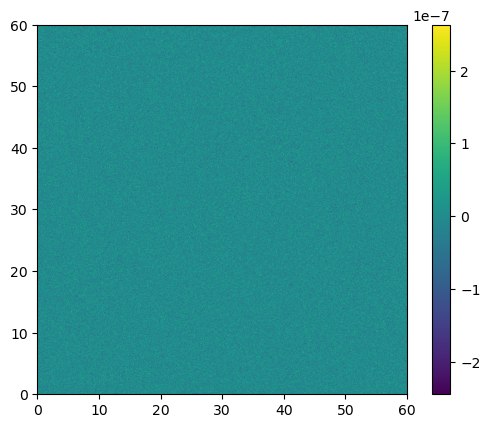

In [13]:
A_s = 1e-9; n_s = 1; k0 = 0.05; mink = 1e-5; Ngrid = 1024
pb = PrimordialPowerspec(A_s, n_s, k0, mink, Ngrid)

plt.imshow(pb.delta_x(),extent=(0,60,0,60))
plt.colorbar()
plt.show()

A_s = 1e-09, n_s = 0.96, k0 = 0.05, boxlength = 628318.5307179586, maxk = 0.01024
Creating a box...


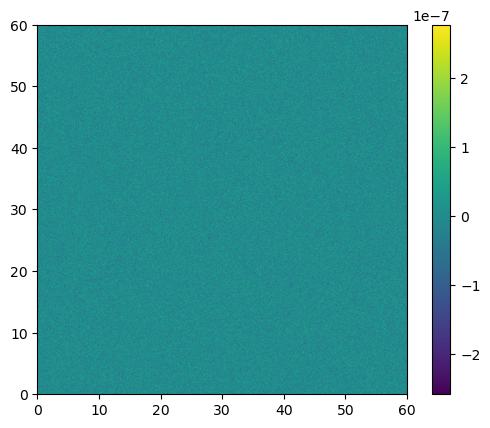

In [17]:
A_s2 = 1e-9; n_s2 = 0.96
pb2 = PrimordialPowerspec(A_s2, n_s2, k0, mink, Ngrid)
plt.imshow(pb2.delta_x(),extent=(0,60,0,60))
plt.colorbar()
plt.show()

In [14]:
from powerbox import get_power

/opt/anaconda3/lib/python3.12/site-packages/powerbox/tools.py:261: FutureWarning: In the future, bins will be generated by default up to the smallest length over any dimension, instead of the largest magnitude for the box.Set bins_upto_boxlen to silence this warning.
  bins = _getbins(bins, coord_mags, log_bins, bins_upto_boxlen=bins_upto_boxlen)


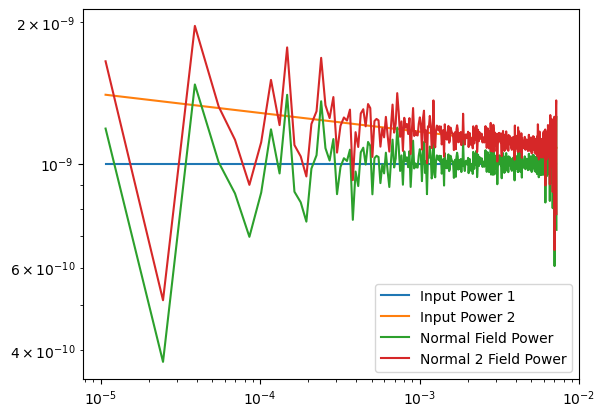

In [18]:
p_k_field, bins_field = get_power(pb.delta_x(), pb.boxlength)
p2_k_field, bins2_field = get_power(pb2.delta_x(), pb2.boxlength)
plt.plot(bins_field, A_s*(bins_field/k0)**(n_s-1), label="Input Power 1")
plt.plot(bins2_field, A_s2*(bins2_field/k0)**(n_s2-1), label="Input Power 2")
plt.plot(bins_field, p_k_field,label="Normal Field Power")
plt.plot(bins2_field, p2_k_field,label="Normal 2 Field Power")
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.show()

### Matter Power spectrum

In [13]:
import camb
from camb import model, initialpower
pars = camb.set_params(
    H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06, As=2e-9, ns=0.965, halofit_version='mead', lmax=3000
)
pars.set_matter_power(redshifts=[0.0, 0.8], kmax=2.0)
# Linear spectra
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints=200)
s8 = np.array(results.get_sigma8())

# Non-Linear spectra (Halofit)
pars.NonLinear = model.NonLinear_both
results.calc_power_spectra(pars)
kh_nonlin, z_nonlin, pk_nonlin = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints=200)

print('sigma 8 values at the two redshifts:', results.get_sigma8())

Note: redshifts have been re-sorted (earliest first)
sigma 8 values at the two redshifts: [0.53337188 0.80309397]


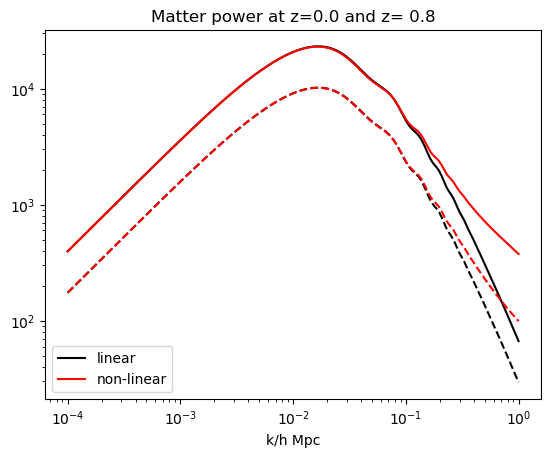

In [14]:
for i, (redshift, line) in enumerate(zip(z, ['-', '--'])):
    plt.loglog(kh, pk[i, :], color='k', ls=line)
    plt.loglog(kh_nonlin, pk_nonlin[i, :], color='r', ls=line)
plt.xlabel('k/h Mpc')
plt.legend(['linear', 'non-linear'], loc='lower left')
plt.title('Matter power at z=%s and z= %s' % tuple(z))
plt.show()

In [ ]:
def approx_powerspec(k, ns, keq):
    if k < keq:
        return k**ns
    else:
        return k**(ns-4)

